Agriculture Dataset with Geometric Properties:
  Field_ID      Shape  Length_m  Width_m  Radius_m Crop_Type  \
0       F1  Rectangle     100.0     50.0       NaN     Wheat   
1       F2     Circle       NaN      NaN      30.0      Corn   
2       F3  Rectangle     150.0     75.0       NaN   Soybean   
3       F4     Circle       NaN      NaN      40.0     Wheat   
4       F5  Rectangle      80.0     60.0       NaN      Corn   

   Yield_tons_per_ha       Area_m2  Perimeter_m   Area_ha  Total_Yield_tons  
0                4.5   5000.000000   300.000000  0.500000          2.250000  
1                6.0   2827.433388   188.495559  0.282743          1.696460  
2                3.8  11250.000000   450.000000  1.125000          4.275000  
3                5.2   5026.548246   251.327412  0.502655          2.613805  
4                5.5   4800.000000   280.000000  0.480000          2.640000  


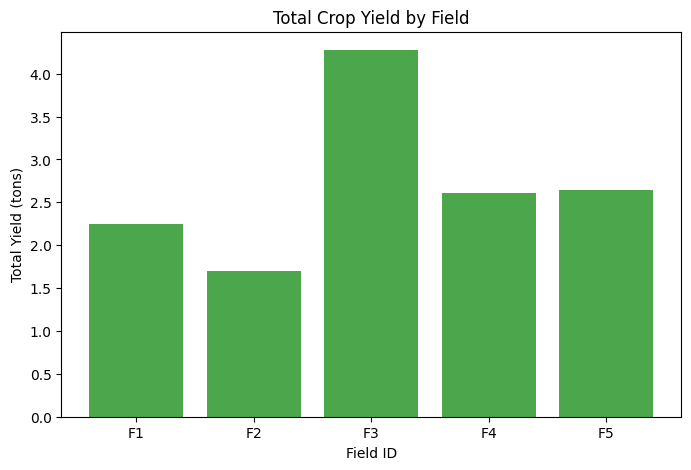

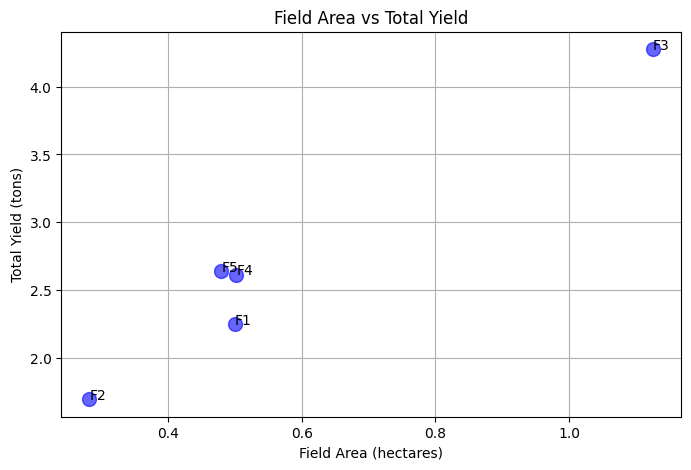


Summary Statistics:
        Area_ha  Perimeter_m  Total_Yield_tons
count  5.000000     5.000000          5.000000
mean   0.578080   293.964594          2.695053
std    0.319277    96.850569          0.961915
min    0.282743   188.495559          1.696460
25%    0.480000   251.327412          2.250000
50%    0.500000   280.000000          2.613805
75%    0.502655   300.000000          2.640000
max    1.125000   450.000000          4.275000

Dataset saved as 'agriculture_geometry_dataset.csv'


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a simple agriculture dataset with geometric properties
data = {
    'Field_ID': ['F1', 'F2', 'F3', 'F4', 'F5'],
    'Shape': ['Rectangle', 'Circle', 'Rectangle', 'Circle', 'Rectangle'],
    'Length_m': [100, None, 150, None, 80],  # Length for rectangles, None for circles
    'Width_m': [50, None, 75, None, 60],     # Width for rectangles, None for circles
    'Radius_m': [None, 30, None, 40, None],  # Radius for circles, None for rectangles
    'Crop_Type': ['Wheat', 'Corn', 'Soybean', 'Wheat', 'Corn'],
    'Yield_tons_per_ha': [4.5, 6.0, 3.8, 5.2, 5.5]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to calculate area based on shape
def calculate_area(row):
    if row['Shape'] == 'Rectangle':
        return row['Length_m'] * row['Width_m']
    elif row['Shape'] == 'Circle':
        return np.pi * row['Radius_m'] ** 2
    return np.nan

# Function to calculate perimeter/circumference based on shape
def calculate_perimeter(row):
    if row['Shape'] == 'Rectangle':
        return 2 * (row['Length_m'] + row['Width_m'])
    elif row['Shape'] == 'Circle':
        return 2 * np.pi * row['Radius_m']
    return np.nan

# Apply calculations to DataFrame
df['Area_m2'] = df.apply(calculate_area, axis=1)
df['Perimeter_m'] = df.apply(calculate_perimeter, axis=1)

# Convert area to hectares (1 ha = 10,000 m²)
df['Area_ha'] = df['Area_m2'] / 10000

# Calculate total yield (tons) = Yield (tons/ha) * Area (ha)
df['Total_Yield_tons'] = df['Yield_tons_per_ha'] * df['Area_ha']

# Display the dataset
print("Agriculture Dataset with Geometric Properties:")
print(df)

# Basic visualization: Bar plot of total yield by field
plt.figure(figsize=(8, 5))
plt.bar(df['Field_ID'], df['Total_Yield_tons'], color='green', alpha=0.7)
plt.xlabel('Field ID')
plt.ylabel('Total Yield (tons)')
plt.title('Total Crop Yield by Field')
plt.show()

# Basic visualization: Scatter plot of Area vs Yield
plt.figure(figsize=(8, 5))
plt.scatter(df['Area_ha'], df['Total_Yield_tons'], c='blue', s=100, alpha=0.6)
for i, txt in enumerate(df['Field_ID']):
    plt.annotate(txt, (df['Area_ha'][i], df['Total_Yield_tons'][i]))
plt.xlabel('Field Area (hectares)')
plt.ylabel('Total Yield (tons)')
plt.title('Field Area vs Total Yield')
plt.grid(True)
plt.show()

# Summary statistics
print("\nSummary Statistics:")
print(df[['Area_ha', 'Perimeter_m', 'Total_Yield_tons']].describe())

# Save dataset to CSV (optional)
df.to_csv('agriculture_geometry_dataset.csv', index=False)
print("\nDataset saved as 'agriculture_geometry_dataset.csv'")